In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/MyDrive/BRL

/content/drive/MyDrive/BRL


In [3]:
%pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
from optimizer_apms_complex import solve
from apms_complex import *

In [5]:
ratio = pd.read_excel('./test.xlsx').iloc[:,1:].values.T
ratio

array([[ 0.  , 18.94, 30.88,  1.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.89,
         0.  ,  0.  ,  0.  ,  0.  ,  0.69,  0.  ,  0.  , 10.79],
       [23.5 ,  0.  , 19.82,  1.43,  0.  ,  1.76,  2.45,  2.57,  7.13,
         7.36,  1.54,  0.  ,  6.53,  3.33,  0.94,  6.3 , 32.5 ],
       [44.64, 34.03,  0.  ,  0.83,  0.69,  0.  ,  0.86,  4.57,  5.68,
         0.  ,  1.54,  2.29,  1.5 ,  4.4 ,  0.  ,  9.07, 12.81],
       [ 1.29,  0.  ,  0.  ,  0.09,  3.86,  0.  ,  1.45,  1.14,  0.  ,
         0.  ,  0.6 ,  0.  ,  0.  ,  1.51,  0.  ,  0.  ,  1.78],
       [ 0.  ,  7.13,  5.97,  0.  , 12.28, 13.28, 21.57,  1.54,  2.45,
         1.37, 21.03,  7.24,  6.09, 14.64, 15.6 ,  1.6 ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.69,  2.42,  2.44,  4.94,  0.  ,  0.  ,
         0.  ,  2.74,  0.  ,  0.  ,  3.39,  0.  ,  0.  ,  0.24],
       [ 2.58,  0.94,  1.65, 27.89,  0.  ,  9.86, 18.8 ,  1.71,  1.67,
         0.  , 16.24,  6.64,  2.91,  7.29,  0.  ,  2.99,  0.24],
       [ 0.43,  0.88,  0.  ,  8.85, 21.96,  0.  

In [6]:
inputs = pd.read_excel('./input_volume_aug.xlsx').values
outputs = pd.read_excel('./output_volume_aug.xlsx').values
print(inputs.shape)
print(outputs.shape)

(120, 17)
(120, 23)


In [7]:
def cosine_score(a, b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [8]:
cosine_score(outputs[56], (ratio/100)@inputs[56])

0.7594816589952761

In [9]:
scores = []
for i in range(120):
    score = cosine_score(outputs[i], (ratio/100)@inputs[i])
    scores.append(score)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Density')

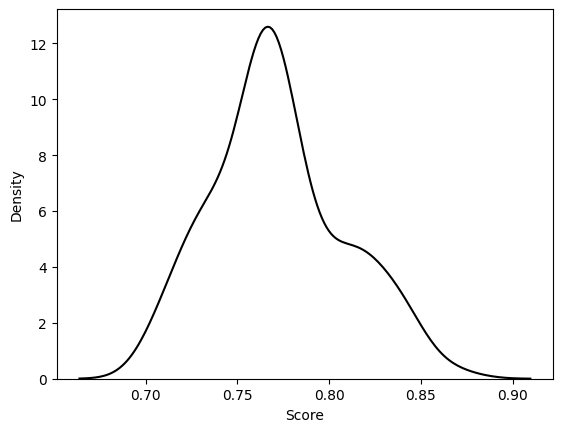

In [11]:
sns.kdeplot(scores, color="black")
plt.xlabel('Score')
plt.ylabel('Density')

In [12]:
scores = []
for i in range(119):
    solution, _ = solve(O_T=outputs[i], I_T=inputs[i])
    x = np.zeros(410)
    for j in solution:
        x[j] = solution[j]
    ratio = get_ratio_matrix(x)
    score = cosine_score(outputs[i+1], (ratio/100)@inputs[i+1])
    scores.append(score)

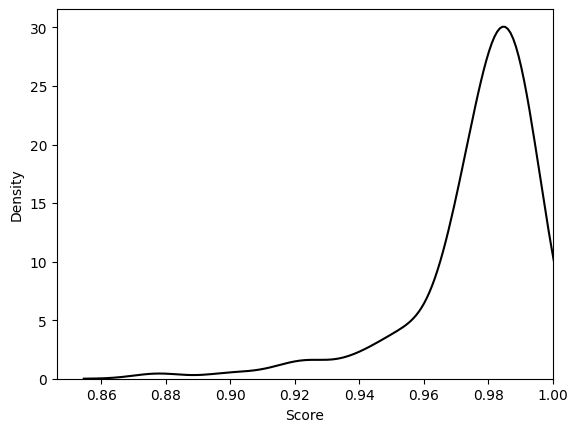

In [14]:
sns.kdeplot(scores, color="black")
plt.xlabel('Score')
plt.ylabel('Density')
plt.xlim(xmax=1)
plt.show()